In [1]:
import numpy as np
import matplotlib.pyplot as plt

import boolean_table_utils as btu

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Boolean Algebra


# Basic Boolean Operations
A boolean variable $A$ is a variable which has only two possible values; $True$ or $False$. In boolean arithmetic, there are only four total possible functions $S=f(A)$ of a single variable; $S=A$ and $S= not\;A$, plus the two constant 'functions', $S=False$ and $S=True$. Because the complete set inputs and outputs is so limited, it is common to write Boolean operators as a 'truth table'; a table that exhaustively maps every possible combination of the inputs on the left to the outputs on the right. For example, here is the truth table for the operation $not\;A$ ($not$ is often called the 'logical complement' in Boolean arithmetic, because it flips everything):


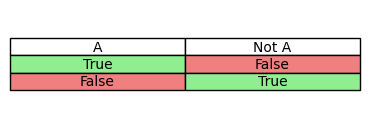

In [2]:
btu.plot_not_table()

A basic binary boolean operator $f(A,B)$ takes two boolean input variables, $A$ and $B$, and outputs a boolean result, $S$: <br>
$S=f(A,B)$. <br>
$S$, $A$, and $B$ can each be either $True$ or $False$, so there are 2\*2\*2=16 distinct possible binary boolean operations. Only 10 of them are functions of both inputs. Of the other 6, two depend only on $A$ ($S=A$ and $S= not \;A$), two depend only on $B$ ($S=B$ and $S= not \;B$), and two depend on neither $A$ nor $B$ ($S=False$ and $S=True$). <br>
Boolean functions with two arguments can also easily be plotted as a truth table. Many of these tables have familiar common English names; for example, the operation where $S$ is $True$ only when both $A$ and $B$ are $True$ is called '$and$'. Below are examples of the truth tables for the $and$ and $or$ operators:

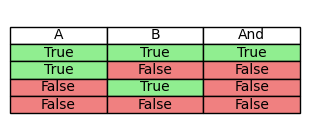

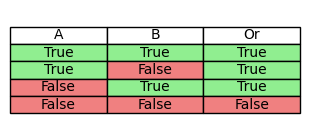

In [3]:
btu.plot_andor_table()

# Building Operators
*Any* Boolean operator can written using some combination of just the three operators $and$, $or$, and $not$ introduced above. Can you write a function that you would call '$nor$' using only those three operators?

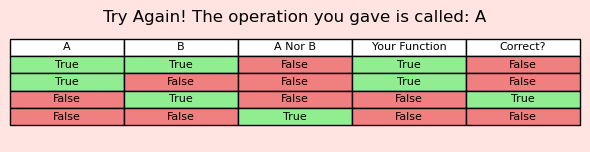

In [4]:
# Write a 'nor' operation 
# You can use any combination of 'and' 'or', and 'not' on the inputs
def nor(A,B):
    return A # Fill in your function here!!!

correct = btu.test_nor(nor)

Not all operators have a single common word that describes them. One operation like this is 'exclusive or', called '$xor$', which is $True$ when one either $A$ or $B$ is $True$ but not both. Can you finish the 'xor' function using only 'and', 'or', and 'not'?

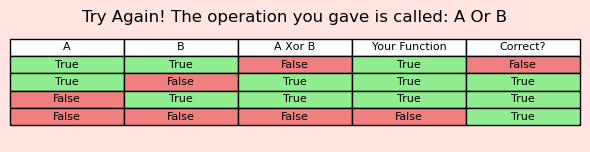

In [5]:
# Write an exclusive or ('xor') operation 
# You can use any combination of 'and' 'or', and 'not' on the inputs
def xor(A,B):
    return A or B # Fill in your function here!!!
    
correct = btu.test_xor(xor)

All four of the functions above ($and$, $or$, $nor$, and $xor$) are symmetrical, in the sense that you get the same result if you swap the inputs A and B. There are two more symmetrical functions; $A\; equals\;B$ (which often called 'if and only if' or $iff$ in Boolean algebra), and $A\;nand\;B$, which is the logical complement of $and$, i.e. $A\;nand\;B=not\;(A\;and\;B)$. 

The remaining 4 functions are asymmetrical (the truth table is not the same if you switch the order of $A$ and $B$). The most common of these are $A\;implies\;B$ and $B\;implies\;A$, often written $->$ and $<-$ respectively. 'implies' means that when the left input is $True$, the right input must be as well, but when the left input is $False$ then the value of the right input does not matter. Can you write an $implies$ using only the symmetrical functions?

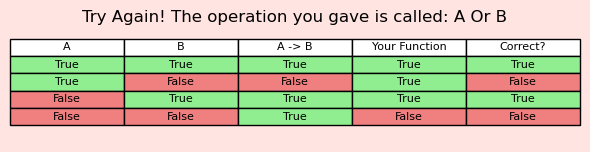

In [6]:
# Write an exclusive or ('imples') operation 
# You can use any combination of 'and' 'or', and 'not' on the inputs
def implies(A,B):
    return A or B # Fill in your function here!!!
    
correct = btu.test_impliesRight(implies)

# Building a Binary Adder
Binary addition in base 2 works much the same way as long addition in base 10 using the familiar 'ripple carry' algorithm; each pair of digits is added separately starting from the least significant digit and working towards the most significant digit, adding any excess ('carry') onto the next digit. Because individual digits in binary have only two possible values, 1 and 0, we can use the Boolean arithmetic above replacing 1 with $True$ and 0 with $False$.

## The Half Adder
The first step in building an adder is to build a module called a 'half adder', which does the computations needed on the first pair of bits, where there are no carries yet. A half adder adds two single digit binary numbers $A$ and $B$, and outputs two separate results; the bit that goes at the current level of significant, $S$, and the carry bit $C_{out}$, which is the amount to be carried on to the next sum. 

The half adder will need to handle the 4 possible input scenarios: 0+0=0, 0+1=1, 1+0=1, and 1+1=10. Can you finish the half adder below?

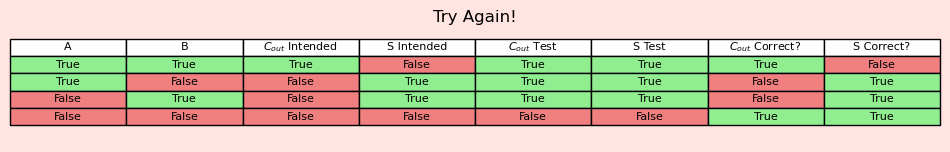

In [7]:
# Finish the half adder, using any of the logic functions written or used above
# Options include and, or, not, nor, xor, and implies.
def half_adder(A,B):
    # Cout is the 'carry' bit; the amount of excess that must be added to a more significant digit
    Cout = A or B # Fill in your function here!
    # S is the 'significant' bit; the amount that remains at this digit
    S = A or B # Fill in your function here!
    return Cout, S

correct = btu.test_half_adder(half_adder)

## The Full Adder
Once we have a working adder, the next thing we need is ... a full adder! A full adder takes *three* binary digits and adds them, instead of just two. The full adder is the operation we will need for the addition steps in the 'ripple' after the first one, which have both an input carry $C_{in}$, from the output step, and and output carry $C_{out}$. Can you finish the full adder below? 

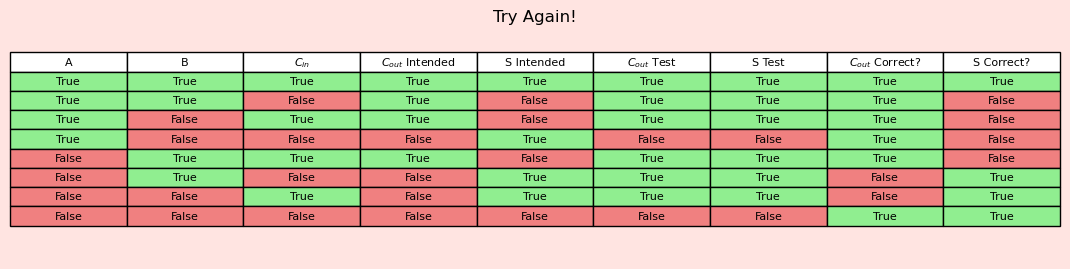

In [8]:
# Finish the full adder, using any of the logic functions written or used above
# Options include and, or, not, nor, xor, and implies.
def full_adder(Cin, A, B):
    # Cout is the 'carry' bit; the amount of excess that must be added to a more significant digit
    Cout = A or B # Fill in your function here!
    # S is the 'significant' bit; the amount that remains at this digit
    S = A or B # Fill in your function here!
    return Cout, S

correct = btu.test_full_adder(full_adder)

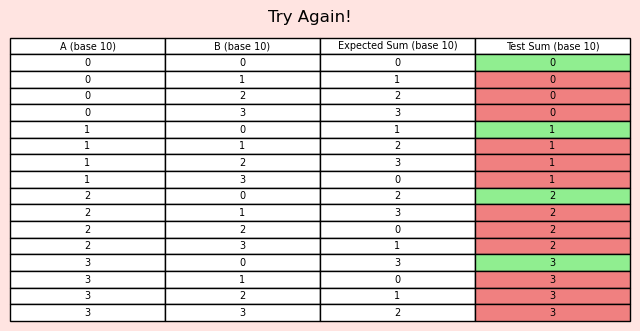

In [9]:
# Finish the ripple adder, using any of the logic functions and full or half adders
def ripple_adder(A, B):
    # A and B are numpy arrays of booleans
    n_bits = A.size

    # The output
    res = np.zeros(n_bits, dtype=np.bool_)

    # Do you need to do something before the start of the loop?
    
    # Assume A and B are 'little endian', meaning that the most significant digits on the left
    # That means we will have to start the ripple at the end of the array and move right with each iteration
    for itr in range(n_bits-1, -1, -1):
        res[itr] = A[itr] # Finish the operations in the loop body?

    # Note: if there is a carry at the end, just throw it away
    return res

fig = btu.gen_adder_figure(ripple_adder, 2)

# Finish
If you made it this far, then you have built a binary adder! The binary adder is the core of nearly all CPU, so it is important for it to be as efficient as possible. Can you think of ways you could make the adder more efficient? For example, can any operations precede in parallel?

# Bonus: Functional Completeness
We call a set of binary operations 'Functionally Complete' if all the other binary operations can be built using only that set of operations as building blocks. Above, we used $and$, $or$, and $not$ to build every binary operation, so that set of operations is functionally complete. Functional completeness is important when designing a computer processor, because it allows us to choose to manufacture circuits for only a subset of operations and build the rest out of compinations. 

In fact, we could have built an $and$ out of just $not$ and $or$ $A\;and\;B = not\;( (not\;A)\;or\;(not\;B)))$. Therefore, 'or' and 'not' must already be functionally complete by themselves, because any time we would have written an 'and' we could just substitute $not\;( (not\;A)\;or\;(not\;B)))$, and we already know that $and$, $or$, and $not$ together are functionally complete. Can you build an $or$ gate out of just $and$ and $not$ gates, to show that $and$ and $not$ are also functionally complete on their own?

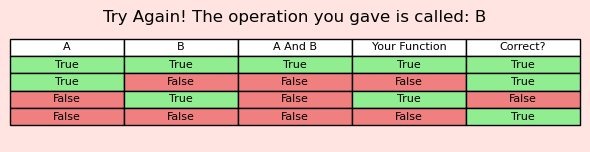

In [13]:
# Can you build an 'and' operation using only 'not' and 'or' gates?
def and_from_or(A,B):
    return B
    
correct = btu.test_and(and_from_or)

We showed above that there are several sets of functionally complete operations that use only two operations. Are there any operations that are functionally complete *all by themselves*? Yes! There are two; $nor$ and $nand$. How do we build every other operation can be built from just $nor$? Lets test it out:

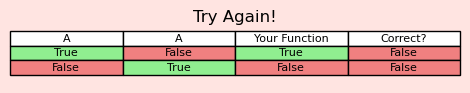

In [12]:
# Can you build a 'not' using only 'nor' gates?
def notV2(A):
    return A

correct = btu.test_not(notV2)

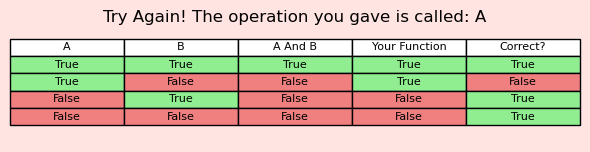

In [10]:
# Can you build an 'and' using only 'nor' gates?
# Hint: you might need the not build aboe
def andV2(A,B):
    return B
    
correct = btu.test_and(andV2)

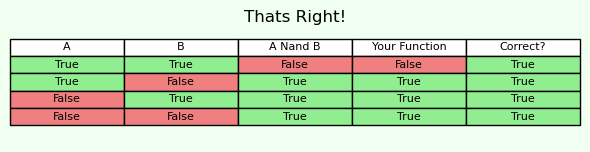

In [17]:
# Can you build a 'nand' gate using only 'nor' gates? 
def nand(A,B):
    return not (A and B)
    
correct = btu.test_nand(nand)

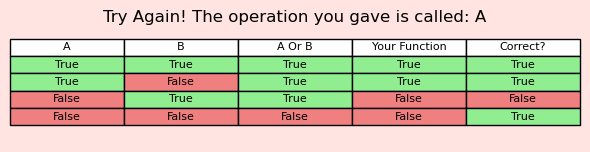

In [14]:
# Can you build an 'or' gate using only 'nor' gates?
def orV2(A,B):
    return A
    
correct = btu.test_or(orV2)

Now that we know $nor$ is functionally complete, we can show that other gate combinations are functionally complete just by showing that they can be used to make a $nor$ gate. Can you show $nand$ is functionally complete by making a $nor$ gate out of only $nand$ gates?

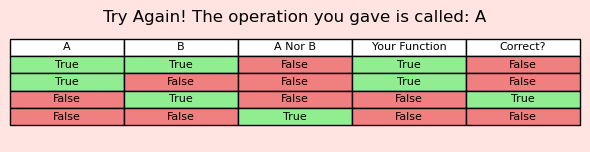

In [25]:
# Can you build a 'nor' gate using only 'nand' gates? 
def norV2(A,B):
    return A
    
correct = btu.test_nor(norV2)